In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
import pandas as pd
import os
from dotenv import load_dotenv
import time
from collections import Counter
import random
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score,precision_score,recall_score
from sklearn.utils import shuffle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import InputLayer,Conv2D,MaxPooling2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.preprocessing import image as IMG

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['shuffle', 'random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [6]:
with open('image_data_array.pickle','rb') as file:
    data = pickle.load(file)
    
    
X_test,y_test = data[1],data[4]

#Split data into train and validation set
#X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,random_state = 17,shuffle =True,test_size =.2)

y_test_hotcode = keras.utils.to_categorical(y_test)

In [15]:
model_path = "model_h5_file"

In [17]:
model_eval ={'accuracy':[],'recall':[],'precision':[],'f1':[],'run_time':[]}
models = []
for model in os.listdir("model_h5_file"):
    if model != '.DS_Store': 
        models.append(model)
        classification = keras.models.load_model(model)
        time1= time.time()
        y_pred = classification.predict(X_test)
        time2= time.time()
        run_time = time2-time1
        y_pred = np.argmax(y_pred,axis =1)
        model_eval['accuracy'].append(accuracy_score(y_test, y_pred))
        model_eval['recall'].append(recall_score(y_test,y_pred,average = 'macro'))
        model_eval['precision'].append(precision_score(y_test, y_pred,average= 'macro'))
        model_eval['f1'].append(f1_score(y_test, y_pred, average = 'macro'))
        model_eval['run_time'].append(run_time)


/Users/kristy/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
model_eval = pd.DataFrame(model_eval,index = models)
model_eval

,accuracy,recall,precision,f1,run_time
mobilnetv2_trainable_array.h5,0.251632,0.125000,0.031454,0.050261,15.846468
vgg16_model_array_trainable.h5,0.651922,0.648371,0.638844,0.638828,83.624269
vgg16_model_array.h5,0.691806,0.688188,0.683530,0.678469,91.981105
mobilnetv2_base_array.h5,0.814358,0.835475,0.820305,0.825591,15.702344
Xception_model_array_trainable.h5,0.817984,0.817621,0.845594,0.830277,33.692630
cnn_model.h5,0.527194,0.488033,0.595368,0.518424,4.929572
Xception_model_array.h5,0.808557,0.808584,0.843299,0.823239,34.079014


In [21]:
int_category_map= {0: 'Gasoline Can',
                 1: 'Hammer',
                 4: 'Screw Driver',
                 6: 'Wrench',
                 3: 'Rope',
                 2: 'Pebbels',
                 5: 'Toolbox',
                 7: 'pliers'}

In [22]:
best_model = keras.models.load_model(model_path+ "/"+"mobilnetv2_base_array.h5")
y_pred = np.argmax(best_model.predict(X_test),axis =1)

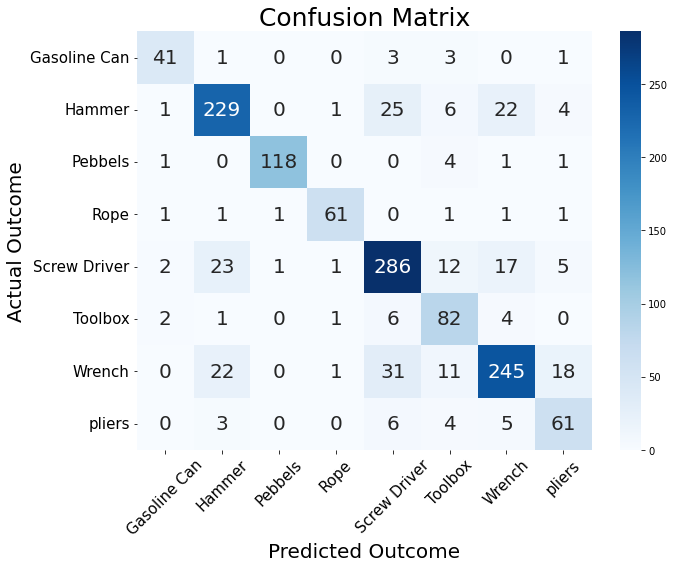

In [23]:
plt.figure(figsize=(10,8))
#plt.subplot(131)
ax = sns.heatmap(confusion_matrix(y_test,y_pred),
            annot = True, annot_kws={"size":20}, fmt="d",cmap = "Blues")

plt.title('Confusion Matrix', size=25)
plt.xlabel('Predicted Outcome', size=20)
plt.ylabel('Actual Outcome', size=20)
labels = [ int_category_map.get(key) for key in sorted(int_category_map.keys())]
ax.set_xticklabels(labels, size=15,rotation = 45)
ax.set_yticklabels(labels, size=15,rotation = 0)
plt.tight_layout()
plt.show();

### Check data with wrong prediction result

In [26]:
df = pd.read_csv("work_data_df",index_col = 0 )
df_test = df[df['class'] == "test"] 
pred_cate = [int_category_map.get(i) for i in y_pred]
df_test['pred_cate'] = pred_cate
df_test_incorrect = df_test[df_test.category != df_test.pred_cate]
df_test_incorrect

/var/folders/py/tfswslv1637f5tfr0ngkmsgr0000gn/T/ipykernel_99128/3250642109.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred_cate'] = pred_cate


,image_path,category,class,pred_cate
12,work_data/test/Gasoline Can/GasolineCan216.jpg,Gasoline Can,test,Screw Driver
20,work_data/test/Gasoline Can/GasolineCan189.jpg,Gasoline Can,test,Toolbox
22,work_data/test/Gasoline Can/GasolineCan176.jpg,Gasoline Can,test,pliers
25,work_data/test/Gasoline Can/GasolineCan214.jpg,Gasoline Can,test,Toolbox
40,work_data/test/Gasoline Can/GasolineCan198.jpg,Gasoline Can,test,Screw Driver
...,...,...,...,...
1357,work_data/test/pliers/Pliers272.jpg,pliers,test,Screw Driver
1358,work_data/test/pliers/Pliers68.jpg,pliers,test,Toolbox
1359,work_data/test/pliers/Pliers266.jpg,pliers,test,Wrench
1360,work_data/test/pliers/Pliers138.jpg,pliers,test,Wrench


95
work_data/test/Screw Driver/ScrewDriver1043.JPEG 

The plot is a : Screw Driver
But classfied as a : Hammer


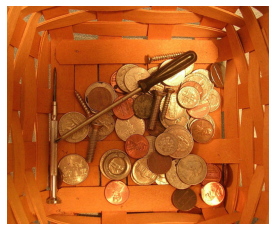

In [36]:
index = np.random.choice(len(df_test_incorrect))
print(index)
#plt.figure(figsize= (12,8))
path = df_test_incorrect.iloc[index,0]
print(path,"\n")
img = IMG.load_img(path)  
x = IMG.img_to_array(img)  
plt.imshow(x/np.max(x))
plt.axis('off')


# print('The plot is a :',int_category_map.get(y_test_incorrect[index]))
# print('But classfied as a :',int_category_map.get(y_pred_incorrect[index]))

print('The plot is a :',df_test_incorrect.iloc[index,1])
print('But classfied as a :',df_test_incorrect.iloc[index,3])